# Understanding data

Hensikt å forstå innhenta rådata

In [2]:
# Loading the Dataset

import pandas as pd

file_name = "../data/blindern.csv" 
try:
    data = pd.read_csv(file_name)
except FileNotFoundError:
    print(file_name, "does not exist")

data.head()

,Navn;Stasjon;Tid(norsk normaltid);Maksimumstemperatur (døgn);Minimumstemperatur (døgn);Nedbør (døgn);Høyeste middelvind (døgn);Snødybde
0,Oslo - Blindern;SN18700;01.01.2015;4.1;-2.4;0;...
1,Oslo - Blindern;SN18700;02.01.2015;6.5;2.9;0.7...
2,Oslo - Blindern;SN18700;03.01.2015;4.5;-0.2;0;7;1
3,Oslo - Blindern;SN18700;04.01.2015;2.7;-2.7;0;...
4,Oslo - Blindern;SN18700;05.01.2015;0.3;-4.4;0;...


In [ ]:
# Understanding the Dataset

print('type:', type(data))
print('shape:', data.shape)

print(data.dtypes)
print("")
data.info()

type: <class 'pandas.core.frame.DataFrame'>
shape: (3654, 1)
Navn;Stasjon;Tid(norsk normaltid);Maksimumstemperatur (døgn);Minimumstemperatur (døgn);Nedbør (døgn);Høyeste middelvind (døgn);Snødybde    object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 1 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                   --------------  ----- 
 0   Navn;Stasjon;Tid(norsk normaltid);Maksimumstemperatur (døgn);Minimumstemperatur (døgn);Nedbør (døgn);Høyeste middelvind (døgn);Snødybde  3654 non-null   object
dtypes: object(1)
memory usage: 28.7+ KB


In [5]:
data.tail()

,Navn;Stasjon;Tid(norsk normaltid);Maksimumstemperatur (døgn);Minimumstemperatur (døgn);Nedbør (døgn);Høyeste middelvind (døgn);Snødybde
3649,Oslo - Blindern;SN18700;28.12.2024;3.2;1.5;4.1...
3650,Oslo - Blindern;SN18700;29.12.2024;4.6;1.7;0.2...
3651,Oslo - Blindern;SN18700;30.12.2024;5.5;-1.6;0;...
3652,Oslo - Blindern;SN18700;31.12.2024;-0.2;-3.8;0...
3653,Data er gyldig per 04.03.2025 (CC BY 4.0). Met...


Ettersom vi tidligere så at det kun var en kolonne så vil det være naturlig å endre dette til videre analyse av data, for å få mer ut av evaluering til "data cleaning". Vi sjekker også hvilke type data det er i kolonnene

In [94]:
df = pd.read_csv(file_name,skipfooter=1, engine='python',delimiter=";")

# Endrer navn på kolonnene for bedre oversikt og gjorde om dato til datetime format
print(df.dtypes)
df.columns = ["Navn", "Stasjon", "Tid", "Makstemp", "Mintemp", "Nedbør", "Vind", "Snø"]
df["Tid"] = pd.to_datetime(df["Tid"], format="%d.%m.%Y")

# OBS! SE OM DET TRENGS Å ENDRE NOE MED TID HVIS KODEN ALLEREDE VAR FEIL

df.describe()

Navn                           object
Stasjon                        object
Tid(norsk normaltid)           object
Maksimumstemperatur (døgn)    float64
Minimumstemperatur (døgn)     float64
Nedbør (døgn)                 float64
Høyeste middelvind (døgn)     float64
Snødybde                       object
dtype: object


,Tid,Makstemp,Mintemp,Nedbør,Vind
count,3653,3653.000000,3653.000000,3653.000000,3653.000000
mean,2020-01-01 00:00:00,11.543882,4.062141,2.418368,5.678237
min,2015-01-01 00:00:00,-15.900000,-23.100000,0.000000,1.600000
25%,2017-07-02 00:00:00,4.200000,-1.100000,0.000000,4.400000
50%,2020-01-01 00:00:00,11.300000,3.500000,0.100000,5.500000
75%,2022-07-02 00:00:00,19.300000,10.400000,2.200000,6.800000
max,2024-12-31 00:00:00,34.600000,21.700000,57.200000,13.700000
std,NaN,9.003188,7.273776,5.356177,1.835857


Vi plotter data for hver kolonne, og sjekker om det er outliers.


C:\Users\Tai khoan chung\AppData\Local\Temp\ipykernel_31660\3948509445.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sno_filled = df['Snø'].fillna(method='ffill', inplace=False)


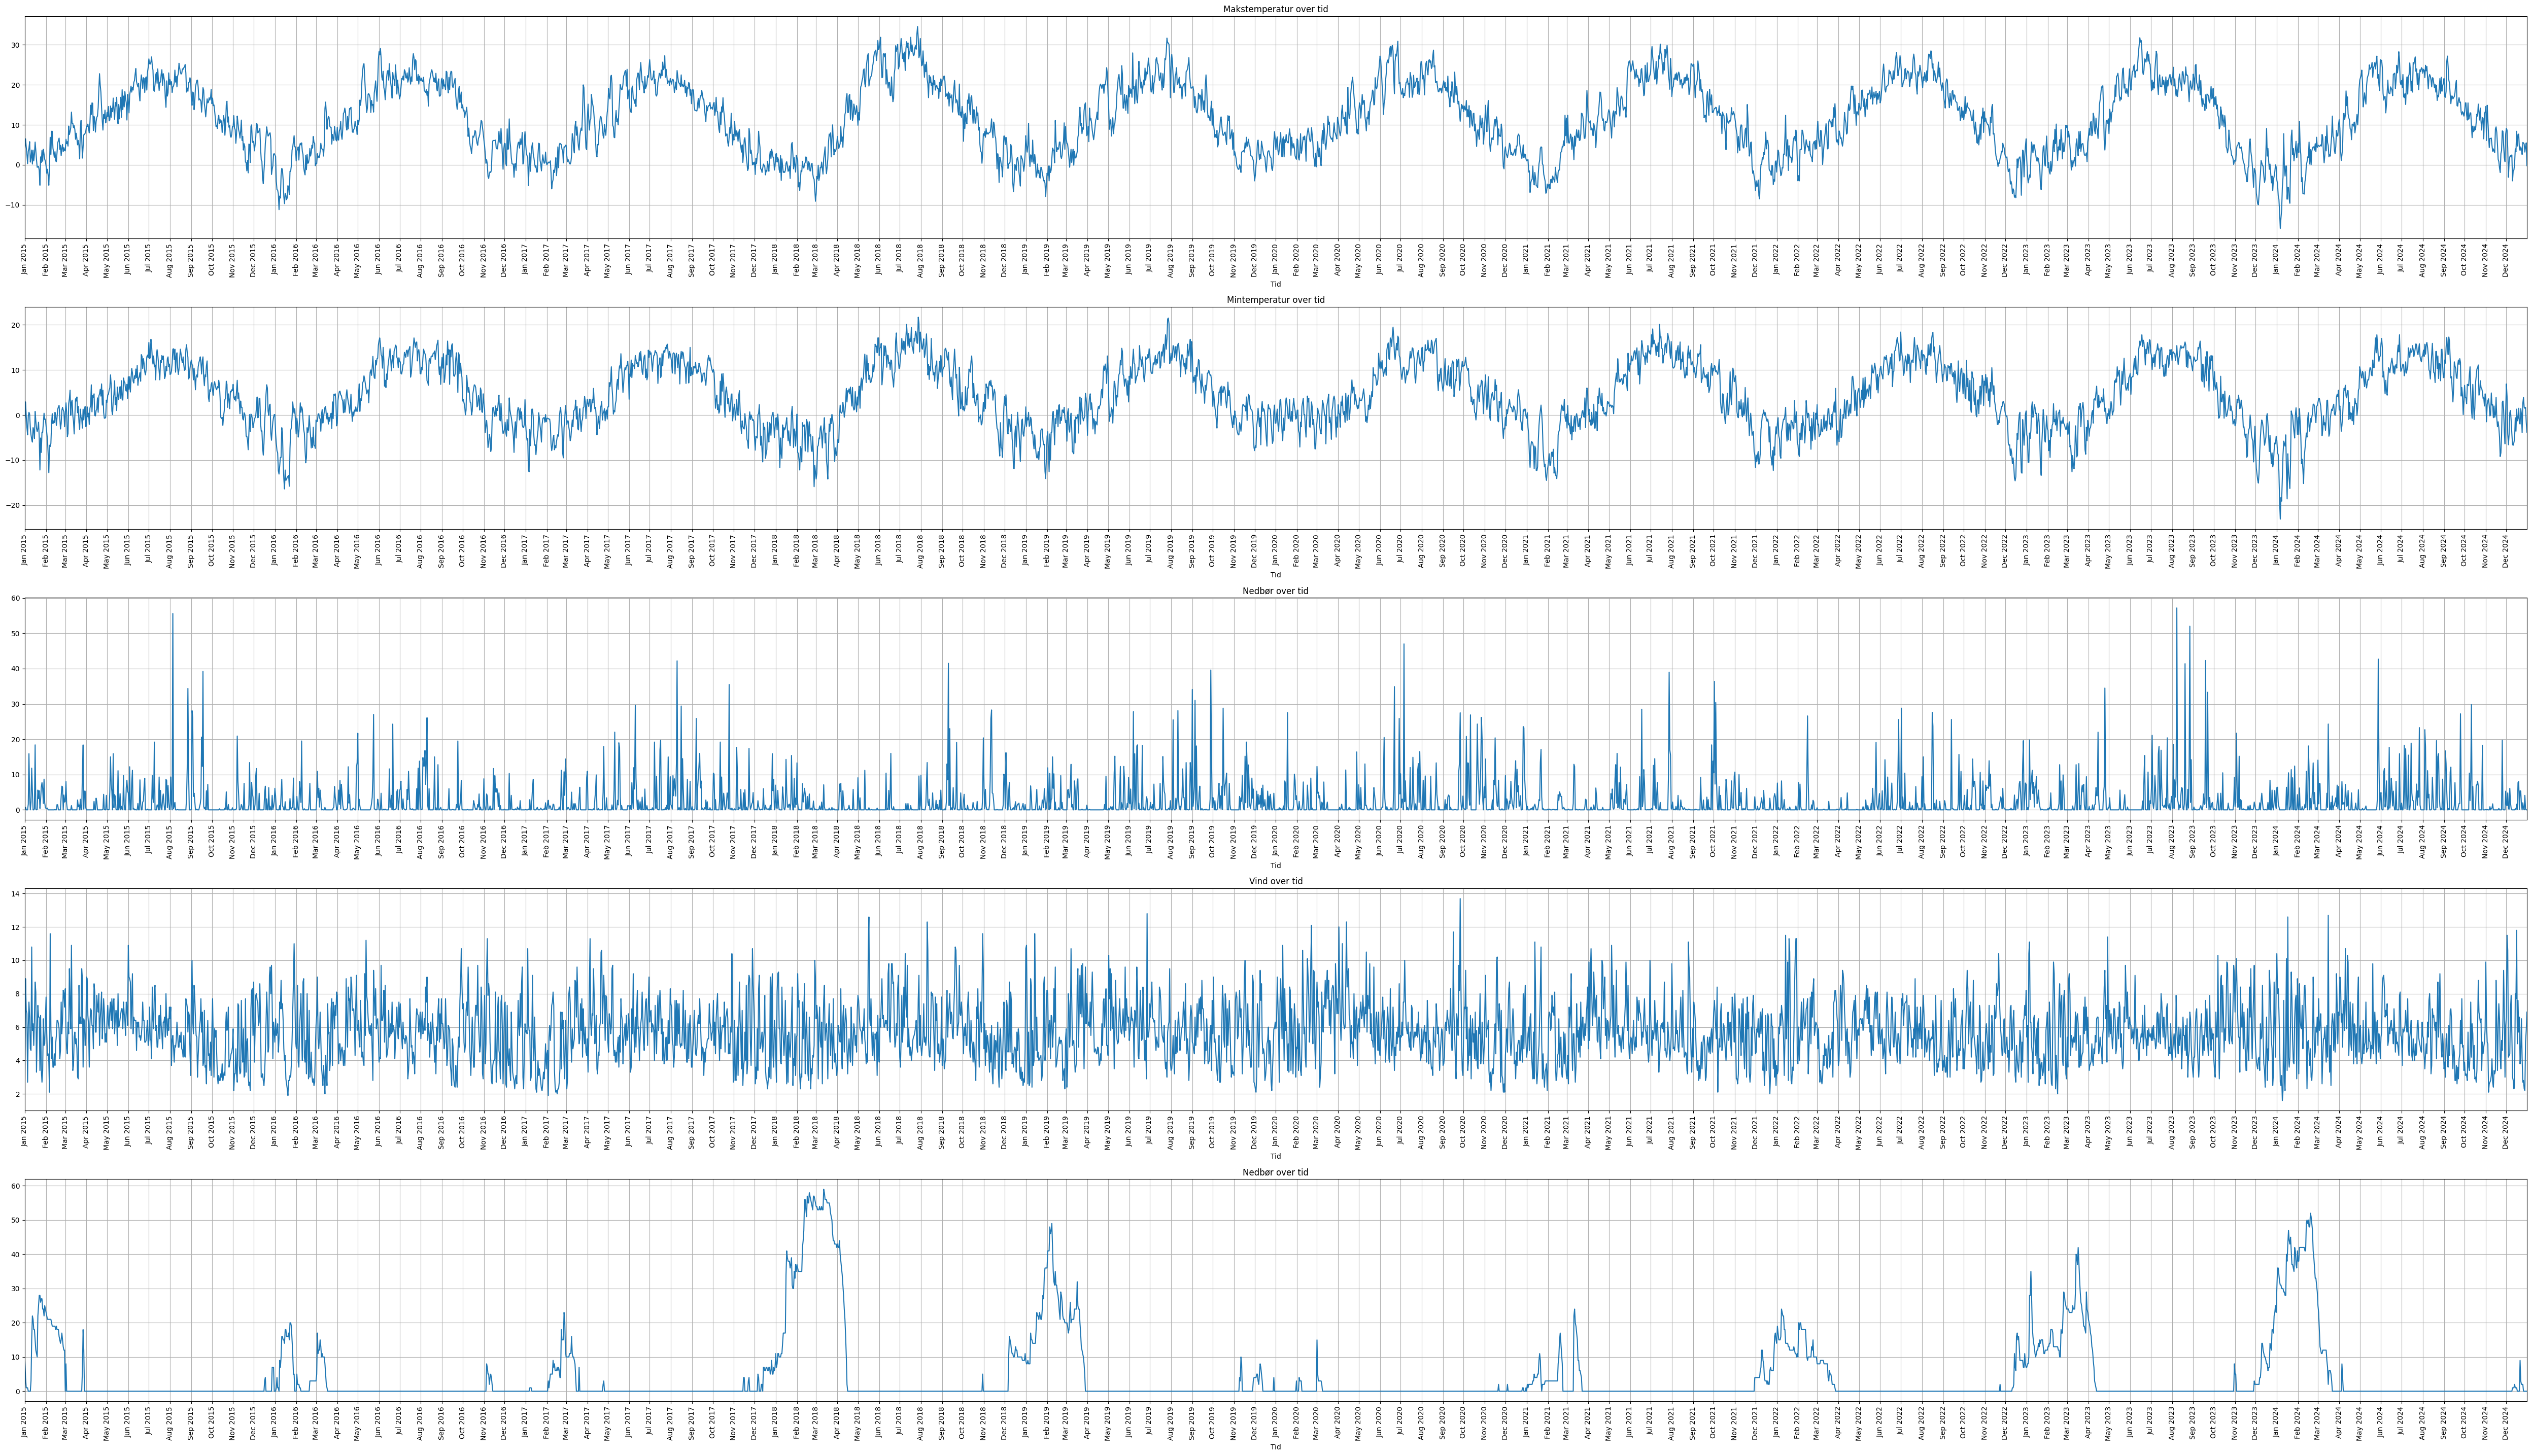

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df['Tid'] = pd.to_datetime(df['Tid'])
df.set_index('Tid', inplace=True)
fig, ax = plt.subplots(5,1,figsize=(50, 30))
# Plotte data
df['Makstemp'].plot(title="Makstemperatur over tid", ax=ax[0])
df['Mintemp'].plot(title="Mintemperatur over tid", ax=ax[1])
df['Nedbør'].plot(title="Nedbør over tid", ax=ax[2])
df['Vind'].plot(title="Vind over tid", ax=ax[3])


#Siden "Snø"-kolonne inneholder noen ikke-målte verdier "-", blir disse verdiene bytte om til NaN for manglende data behandling
df['Snø'] = pd.to_numeric(df['Snø'], errors='coerce') 
sno_filled = df['Snø'].fillna(method='ffill', inplace=False)
sno_filled.plot(title="Snødybde over tid", ax=ax[4])

#gi x-aksen verdier månedsvis
for a in ax:
    a.xaxis.set_major_locator(mdates.MonthLocator())
    a.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    a.grid(True)
    a.tick_params(axis='x', rotation=90)
    








plt.tight_layout(rect=[0, 0, 1, 0.96]) 

plt.grid(True)
plt.show()

